<a href="https://colab.research.google.com/github/SwarnaDharshiniS/CFG_Masters_2024/blob/main/week_1_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/life expectancy.csv')

In [ ]:
data.head(5)

,Country Name,Country Code,Region,IncomeGroup,Year,Life Expectancy World Bank,Prevelance of Undernourishment,CO2,Health Expenditure %,Education Expenditure %,Unemployment,Corruption,Sanitation,Injuries,Communicable,NonCommunicable
0,Afghanistan,AFG,South Asia,Low income,2001,56.308,47.8,730.0,NaN,NaN,10.809000,NaN,NaN,2179727.10,9689193.70,5795426.38
1,Angola,AGO,Sub-Saharan Africa,Lower middle income,2001,47.059,67.5,15960.0,4.483516,NaN,4.004000,NaN,NaN,1392080.71,11190210.53,2663516.34
2,Albania,ALB,Europe & Central Asia,Upper middle income,2001,74.288,4.9,3230.0,7.139524,3.4587,18.575001,NaN,40.520895,117081.67,140894.78,532324.75
3,Andorra,AND,Europe & Central Asia,High income,2001,NaN,NaN,520.0,5.865939,NaN,NaN,NaN,21.788660,1697.99,695.56,13636.64
4,United Arab Emirates,ARE,Middle East & North Africa,High income,2001,74.544,2.8,97200.0,2.484370,NaN,2.493000,NaN,NaN,144678.14,65271.91,481740.70


In [ ]:
data.dtypes

,0
Country Name,object
Country Code,object
Region,object
IncomeGroup,object
Year,int64
Life Expectancy World Bank,float64
Prevelance of Undernourishment,float64
CO2,float64
Health Expenditure %,float64
Education Expenditure %,float64


In [ ]:
data.shape

(3306, 16)

In [ ]:
data.isnull().sum()

,0
Country Name,0
Country Code,0
Region,0
IncomeGroup,0
Year,0
Life Expectancy World Bank,188
Prevelance of Undernourishment,684
CO2,152
Health Expenditure %,180
Education Expenditure %,1090


Data Cleaning - Missing values

In [ ]:
# 1. Remove columns with too many missing values (if more than 50% missing)
data.dropna(axis=1, thresh=len(data) * 0.5, inplace=True)
print("Columns with many missing values removed:", data.shape)

Columns with many missing values removed: (3306, 15)


In [ ]:
# 2. Using Mean imputation for 'Health Expenditure %' and 'Education Expenditure %' columns
data['Health Expenditure %'].fillna(data['Health Expenditure %'].mean(), inplace=True)
data['Education Expenditure %'].fillna(data['Education Expenditure %'].mean(), inplace=True)

In [ ]:
# 3. Using Median imputation for 'Unemployment' column
data['Unemployment'].fillna(data['Unemployment'].median(), inplace=True)

In [ ]:
# 4. Using mode imputation for the "Prevalence of Undernourishment" column
data["Prevelance of Undernourishment"].fillna(data["Prevelance of Undernourishment"].mode()[0], inplace=True)

In [ ]:
# 5. Fill missing values based on Region or IncomeGroup averages (group-based imputation)
data['Sanitation'] = data.groupby('Region')['Sanitation'].transform(lambda x: x.fillna(x.mean()))

,Sanitation
0,36.286540
1,15.668302
2,40.520895
3,21.788660
4,58.398339
...,...
3301,51.168487
3302,47.698788
3303,15.668302
3304,15.668302


In [ ]:
# 6. Interpolating missing values for Life Expectancy World Bank
data['Life Expectancy World Bank'] = data['Life Expectancy World Bank'].interpolate()
data['CO2'] = data['CO2'].interpolate()

In [ ]:
data.isnull().sum()

,0
Country Name,0
Country Code,0
Region,0
IncomeGroup,0
Year,0
Life Expectancy World Bank,0
Prevelance of Undernourishment,0
CO2,0
Health Expenditure %,0
Education Expenditure %,0


In [ ]:
data.describe()

,Year,Life Expectancy World Bank,Prevelance of Undernourishment,CO2,Health Expenditure %,Education Expenditure %,Unemployment,Sanitation,Injuries,Communicable,NonCommunicable
count,3306.000000,3306.000000,3306.000000,3.306000e+03,3306.000000,3306.000000,3306.000000,3306.000000,3.306000e+03,3.306000e+03,3.306000e+03
mean,2010.000000,69.750980,8.974622,1.516662e+05,6.364059,4.589014,7.709541,46.327720,1.318219e+06,4.686289e+06,7.392488e+06
std,5.478054,9.233615,10.580639,7.552286e+05,2.764345,1.734866,6.002558,27.770068,5.214068e+06,1.843727e+07,2.932688e+07
min,2001.000000,40.369000,2.500000,1.000000e+01,1.263576,0.850320,0.100000,2.377647,4.304900e+02,3.301600e+02,2.481820e+03
25%,2005.000000,63.802250,2.500000,2.180000e+03,4.304727,3.698569,3.906250,18.772260,6.245688e+04,5.776475e+04,3.184758e+05
50%,2010.000000,72.119037,3.700000,9.890000e+03,6.146391,4.589014,5.920000,38.992948,2.456910e+05,3.147693e+05,1.350146e+06
75%,2015.000000,76.519000,11.600000,5.707750e+04,8.001557,4.922585,9.500750,71.614850,8.465591e+05,2.831636e+06,3.918468e+06
max,2019.000000,84.356341,70.900000,1.070722e+07,24.230680,23.270000,37.250000,100.000004,5.563676e+07,2.685646e+08,3.246378e+08


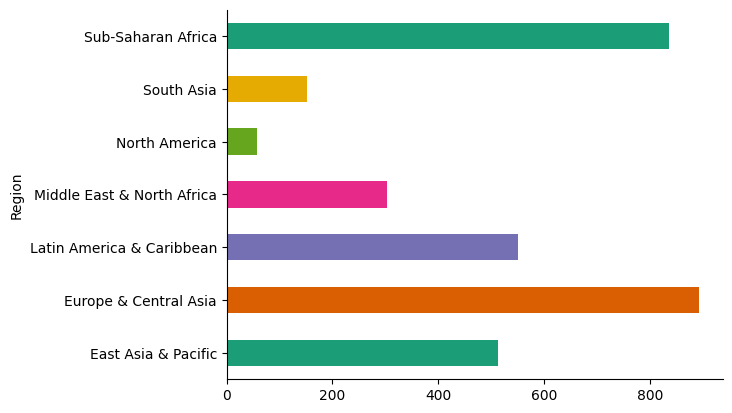

In [ ]:
# @title Region

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('Region').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

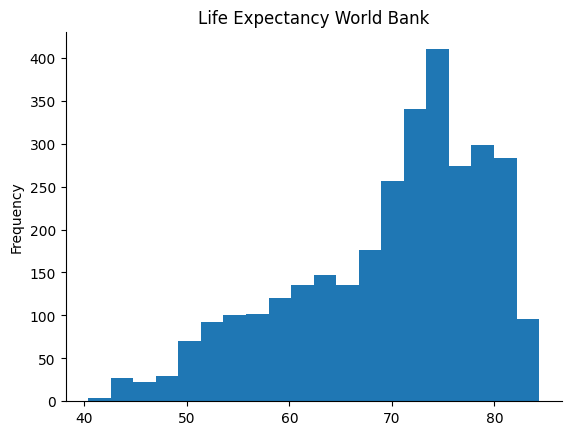

In [ ]:
# @title Life Expectancy World Bank

from matplotlib import pyplot as plt
data['Life Expectancy World Bank'].plot(kind='hist', bins=20, title='Life Expectancy World Bank')
plt.gca().spines[['top', 'right',]].set_visible(False)

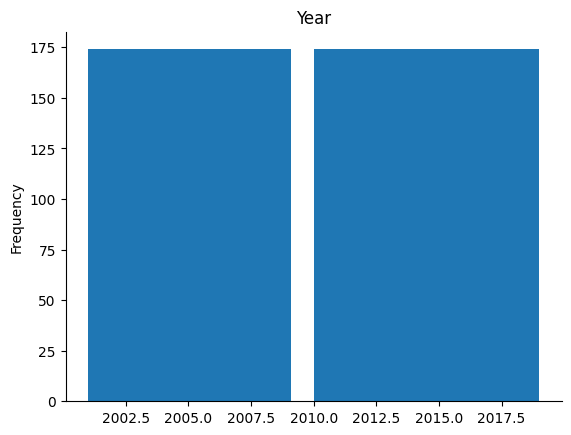

In [ ]:
# @title Year

from matplotlib import pyplot as plt
data['Year'].plot(kind='hist', bins=20, title='Year')
plt.gca().spines[['top', 'right',]].set_visible(False)